In [1]:
# from IPython.display import Image
from PIL import Image
import pandas as pd

# Classification metrics optimization

## 1. LogLoss
**Available**
- Tree-based
> XGBoost, LightGBM
> 
> sklearn.RandomForestClassifier X

- Linear models
> sklearn.<>Regression
> 
> sklearn.SGDRegressor
>
> Vowpal Wabbit

- Neural Nets
> PyTorch, Keras, Tf, etc

**synonyms : Logistic loss**


### Probability calibration 
- rf classifier에서는 logloss를 지원안함. 
- 그래서 prediction을 보면 양 끝단이 target rolling mean과 차이가 많이 남. 그래서 logloss로 계산하면 bad score. 
- prediction calibration 필요

#### Probability calibration
- platt scaling
    - 내 prediction으로 logistic regression을 fitting. (maybe blending)
    
- Isotonic regression
    - 내 prediction으로 isotonic regression을 fitting. (maybe blending)
    
- Stacking
    - 내 prediction으로 XGboost나 NN을 fitting. (Maybe blending)
    


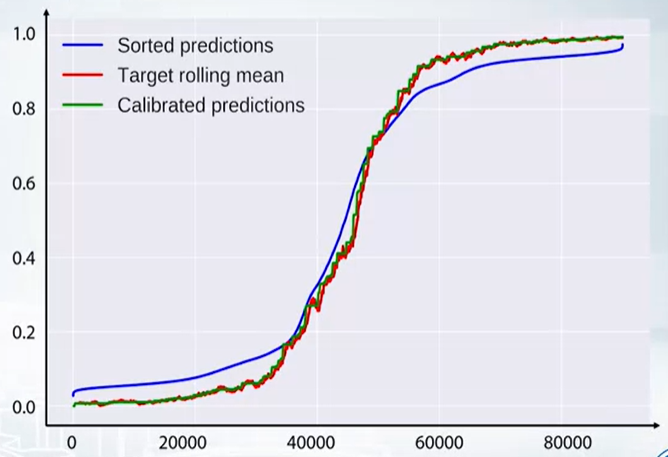

In [2]:
Image.open('img12.png')

## 2. Accuracy

- 바로 optimize를 하는 방법이 없음. 
- binary classification의 경우
    - 아무 metric으로 fit하고 threshold를 조절한다.
- multiclass 
    - 아무 metric으로 fit하고 parameter tuning을 accuracy를 보고 한다.
- threshold 조절
    - grid search를 통해 찾을 수 있다.
    
### Accuray에서 중요한 것은 어떤 loss로 optimize하느냐보다, 좋은 threshold를 잡는 것.
    
#### 왜 어려울까

- 밑에 그림을 보면 accuracy는 zero-one loss에 해당한다. 
- zero-one loss는 모든 지점에서 gradient가 0이기 때문에 최적화하기 어렵다.
- 그래서 생각해낸게 proxy loss(logloss, hinge loss)

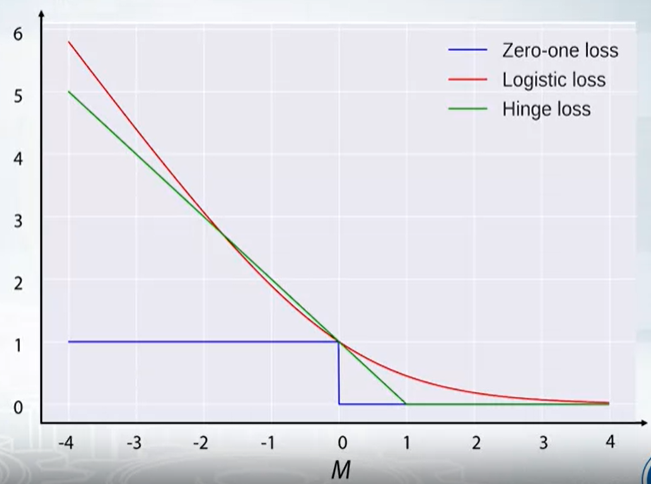

In [4]:
Image.open('img13.png')

# 3. AUC
- accuracy와 마찬가지로 모든 지점에서 gradient가 0
- 하지만 gradient based method로 AUC 최적화하는 방법이 있음.
### pairwise loss
아직 이해가 잘 안됏음

**Available**
- tree-based
> XGBoost, LightGBM

- linear models
> X

- Neural nets
> PyTorch, Keras, Tf - not out of the box
---
개인적인 경험으로 logloss로 xgb학습했을 때와 pairwise로 학습했을 때 auc 큰 차이 없음.

# 4. Quadratic weighted Kappa

### using MSE
1. Optimize MSE
    - ordered classification problem, integer label
    - 그렇지만 regression problem으로 접근해서 prediction을 post-processing 해줄 것임.
    - kappa에서 Quadratic weighted error가 mse와 비슷함. 그래서 MSE를 사용
    $$
    Kappa(y,\hat y) = 1 - \frac{MSE(y,\hat y}{hard~to~deal~with~part}
    $$


2. Find right thresholds
    - Bad : np.round(predictions)
    - Better : optimize thresholds => with grid search
